## About the Notebook:

This study examines spatial and environmental factors associated with river water quality by integrating in-situ measurements with remotely sensed and climate-based data. Satellite imagery from Landsat and climate variables from the TerraClimate dataset were used to provide broader environmental context around observed water quality conditions. From Landsat, selected spectral bands and water-related indices were included to capture surface and moisture characteristics, while Potential Evapotranspiration (PET) from TerraClimate was incorporated to reflect underlying climatic influences.

The analysis focuses on data collected between 2011 and 2015. Relevant satellite and climate features were retrieved using API-based access through the Microsoft Planetary Computer portal and combined with water quality observations. Together, these datasets support an exploratory assessment of three key water quality parameters: Total Alkalinity (TA), Electrical Conductance (EC), and Dissolved Reactive Phosphorus (DRP).

In [ ]:
import pandas as pd

def primary_dataset(landsat='landsat_features_training.csv', terraclimate='terraclimate_features_training.csv', wq='water_quality_training_dataset.csv', col='Sample Date'):
    '''
    input: 3 primary datasets (CSV files) from EY's Water Quality Prediction: Benchmark Notebook
    return: merged pandas dataframe with added bin column (monthly) joined on GPS coordinates and date
    '''
    # read CSVs
    landsat = pd.read_csv(landsat)
    terraclimate = pd.read_csv(terraclimate)
    wq = pd.read_csv(wq)

    # merge features and targets on coordinates and date; convert to datetime
    landsat_terracl = pd.merge(landsat, terraclimate)
    landsat_terracl_wq = pd.merge(landsat_terracl, wq)
    landsat_terracl_wq[col] = pd.to_datetime(landsat_terracl_wq[col], dayfirst=True, errors='coerce')

    # bin according to month
    bins = pd.date_range(start=landsat_terracl_wq[col].min(), end=landsat_terracl_wq[col].max(), freq='ME')
    landsat_terracl_wq['binned_months'] = pd.cut(landsat_terracl_wq[col], bins=len(bins), labels=bins)

    print('We will explore Water Quality over the course of',len(landsat_terracl_wq[['binned_months']].groupby('binned_months').count()),'months.')

    return landsat_terracl_wq

In [8]:
df = primary_dataset()
df.head()

We will explore Water Quality over the course of 60 months.


,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,pet,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,binned_months
0,-28.760833,17.730278,2011-01-02,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2,128.912,555.0,10.0,2011-01-31
1,-26.861111,28.884722,2011-01-03,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1,74.720,162.9,163.0,2011-01-31
2,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5,89.254,573.0,80.0,2011-01-31
3,-27.671111,27.236944,2011-01-03,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7,82.000,203.6,101.0,2011-01-31
4,-27.356667,27.286389,2011-01-03,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2,56.100,145.1,151.0,2011-01-31


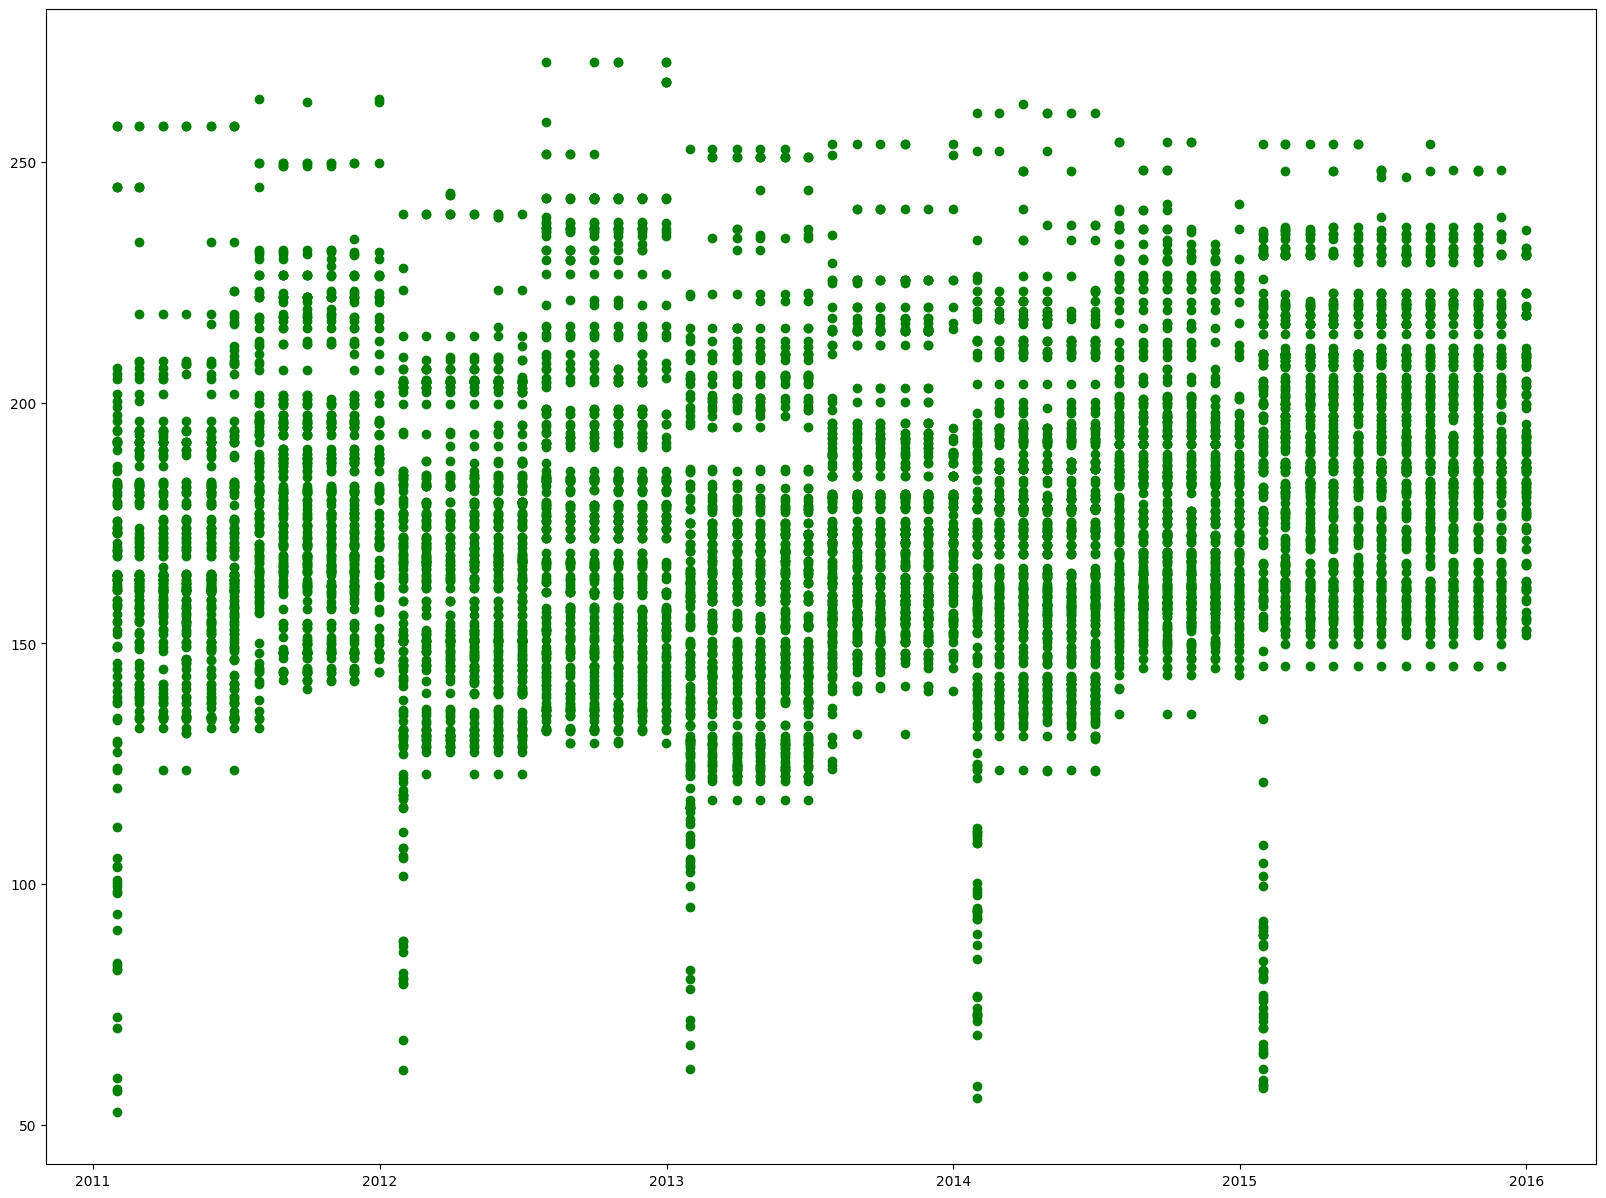

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 15))
ax.scatter(df['binned_months'], df['pet'], color='green');